## To implement the DBSCAN clustering algorithm on a synthetic dataset 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

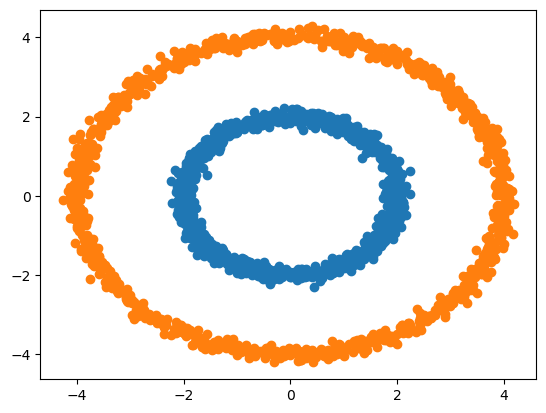

In [30]:
def create_circle(radius, num_points=1000, noise=0.1):
    
    theta1=np.linspace(0, 2*np.pi, num_points)
    
    x1=radius*np.cos(theta1) + noise*np.random.randn(num_points)
    y1=radius*np.sin(theta1) + noise*np.random.randn(num_points)
    return x1, y1


x1, y1 = create_circle(2)
x2, y2 = create_circle(4)
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

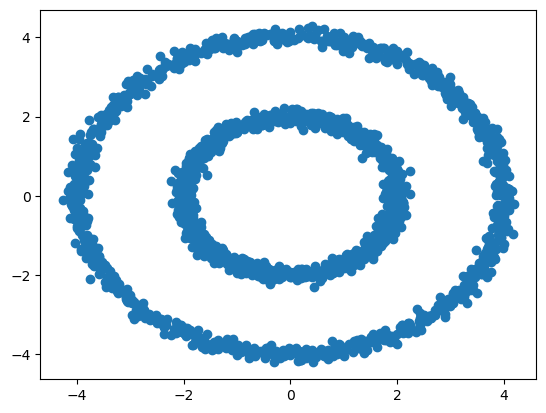

In [31]:
combined_x = np.concatenate((x1, x2))
combined_y = np.concatenate((y1, y2))

plt.scatter(combined_x, combined_y)
plt.show()

### Now we implement DBSCAN algorithm

In [32]:
def region_query(D, P, eps):
    neighbours=[]
    for Pn in range(0, len(D)):
        if np.linalg.norm(D[P]- D[Pn])<eps:
            neighbours.append(Pn)
    
    return neighbours

In [33]:
def grow_cluster(D, labels, P, neighbour_pts, C, eps, min_pts):
    labels[P] = C #assign the cluster number to this new cluster
    i=0
    processed_points = set(neighbour_pts)  # keep track of processed points
    while i<len(neighbour_pts):
        Pn = neighbour_pts[i]

        if labels[Pn]==0 or labels[Pn]==-1:
            labels[Pn]=C #add pt to cluster if it was leaf or unclaimed earlier

        Pn_neighbour_pts= region_query(D, Pn, eps)

        if len(Pn_neighbour_pts)>=min_pts: #if it has atleast min neighbours then it is a branch pt.
            for point in Pn_neighbour_pts:
                if point not in processed_points:
                    neighbour_pts.append(point)
                    processed_points.add(point)

        i+=1 #move to the next point in the queue

In [34]:
def dbscan(D, eps, min_pts):
    labels = [0] * len(D)
    C = 0

    for P in range(0, len(D)):
        if labels[P] != 0:
            continue
        neighbour_pts = region_query(D, P, eps)  # find all neighbouring points of P

        if len(neighbour_pts) < min_pts:
            labels[P] = -1  # mark as noise
        else:
            C += 1
            grow_cluster(D, labels, P, neighbour_pts, C, eps, min_pts)  # if there are at least min_pts nearby, make it seed for new cluster

    return labels

Running the implementation, this will take a while to run!


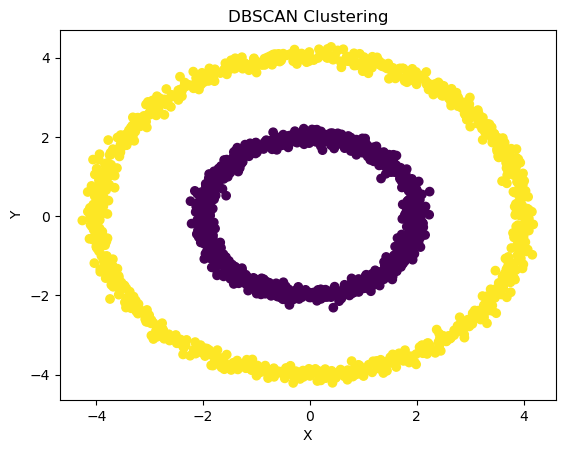

In [35]:
print("Running the implementation, this will take a while to run!")
# Combine x and y into a single dataset
D = np.vstack((combined_x, combined_y)).T

eps = 0.3
min_pts=2
labels = dbscan(D, eps, min_pts)

plt.scatter(combined_x, combined_y, c=labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()